In [42]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
import pandas as pd
import re
from wordcloud import WordCloud
import contractions
import collections
import seaborn as sns
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from collections import Counter


subreddit = 'politics'
type_of_content = 'submissions'
column = 'title'
filename = f'./data/{subreddit}_{type_of_content}_redditapi.csv'
stop = nltk.corpus.stopwords.words('english')
tokenizer = nltk.RegexpTokenizer(r"\w+")
lemmatizer = nltk.WordNetLemmatizer()

dataframe = pd.read_csv(filename)
dataframe.head()

,id,full_link,author,title,self_text,num_comments,score
0,t239gl,https://secondnexus.com/trump-putin-smart-ukra...,NaN,Trump Doubled Down on Praising Putin's 'Smart'...,[deleted],1,1
1,t2391i,https://nymag.com/intelligencer/2022/02/marjor...,throwaway5272,Marjorie Taylor Greene Was Surprise Speaker at...,NaN,464,4915
2,t237lr,https://abcnews.go.com/Politics/biden-announce...,Challenge_Tough,"""Biden announces new sanctions on Russian bank...",NaN,2,7
3,t2370t,https://www.theguardian.com/media/2022/feb/25/...,CyberArtillery,Tucker Carlson leads rightwing charge to blame...,NaN,33,232
4,t236ts,https://twitter.com/kyivindependent/status/149...,gsa51,No fly zone.,NaN,1,1


In [43]:
comments = dataframe[column]

preprocessed_comments = []

for comment in comments:
    comment = str(comment)
    comment = comment.lower()
    comment = re.sub(r"(@\[A-Za-z0-9]+)|(\w+:\/\/\S+)|^&gt;","",comment)
    comment = " ".join(word for word in comment.split() if word not in stop)
    comment = " ".join(contractions.fix(word) for word in comment.split())
    comment = " ".join(word for word in comment.split() if word not in stop)

    comment = re.sub(r"[^0-9A-Za-z \t]","",comment)
    comment = tokenizer.tokenize(comment)
    comment = [lemmatizer.lemmatize(word, pos="v") for word in comment]
    preprocessed_comments.append(comment)


* https://github.com/britt-allen/classifying_reddit_posts/blob/master/notebooks/project_3_data_cleaning_and_eda.ipynb
* monkeylearn.com/blog/text_cleaning


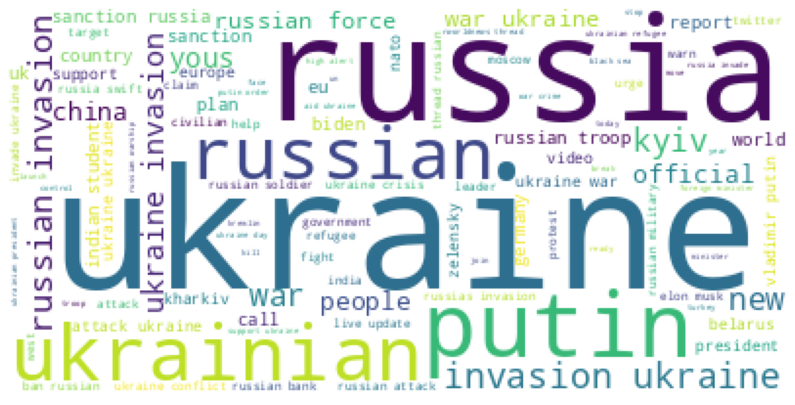

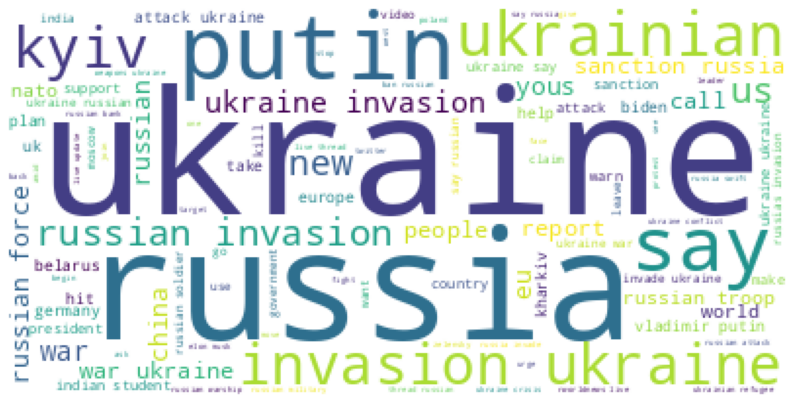

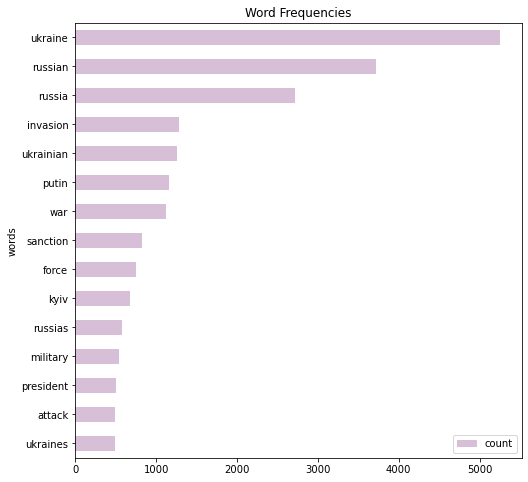

In [40]:
wordcloud_text = ''
wordcloud_all = ''
frequency = []
textfile = open(f'./data/{subreddit}_{type_of_content}_wordlist.txt', "w")

for comment in preprocessed_comments:
    pos = nltk.pos_tag(comment)
    for word in pos:
        wordcloud_all = wordcloud_all + word[0] + ' '
        textfile.write(word[0] + "\n")
        if word[1] in {'NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS'}:
            wordcloud_text = wordcloud_text + word[0] + ' '
            frequency.append(word[0])

textfile.close()

wc = WordCloud(max_words=100, background_color='white').generate(wordcloud_text)
plt.figure(figsize = (14, 14))
plt.axis('off')
plt.title(f'r/{subreddit} wordcloud without verbs')
plt.imshow(wc)
plt.savefig(f'./images/words/{subreddit}_wordcloud_nouns.png')

wc2 = WordCloud(max_words=100, background_color='white').generate(wordcloud_all)
plt.figure(figsize = (14, 14))
plt.axis('off')
plt.title(f'r/{subreddit} wordcloud')
plt.imshow(wc2)
plt.savefig(f'./images/words/{subreddit}_wordcloud.png')

word_frequency = collections.Counter(frequency)
word_frequency.most_common(15)
word_frequency = pd.DataFrame(word_frequency.most_common(15), columns=['words', 'count'])

fig, ax = plt.subplots(figsize=(8, 8))
word_frequency.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color='thistle')
plt.title(f'r/{subreddit} Word Frequencies')
plt.savefig(f'./images/words/{subreddit}_wordfrequency.png')

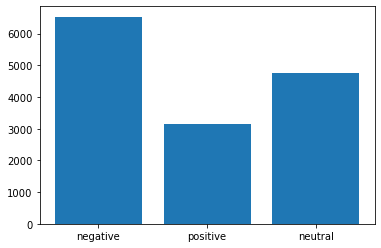

In [41]:
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiments = []
for comment in comments:
    sentiment = sentiment_analyzer.polarity_scores(comment)
    if sentiment['compound'] >= 0.05:
        sentiments.append('positive')
    elif sentiment['compound'] <= -0.05:
        sentiments.append('negative')
    else :
        sentiments.append('neutral')

a = dict(Counter(sentiments))

keys = list(a.keys())
values = list(a.values())

plt.bar(range(len(a)), values, tick_label=keys)
plt.title(f'r/{subreddit} sentiments')
plt.savefig(f'./images/words/{subreddit}_sentiments.png')
plt.show()

